<a href="https://colab.research.google.com/github/mohamedsayed18/Pose_estimation/blob/master/sharkey_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import cv2 
from matplotlib import pyplot as plt

In [73]:
#load my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
interpreter = tf.lite.Interpreter("/content/drive/My Drive/innopolis/1st year courses/2nd term/CV/GP/posenet.tflite")
interpreter.allocate_tensors()
input_details = model.get_input_details()
output_details = model.get_output_details()
floating_model = input_details[0]['dtype'] == np.float32


In [0]:
# the image
img = cv2.imread("/content/drive/My Drive/innopolis/1st year courses/2nd term/CV/GP/data/face.jpg")
img2 = cv2.resize(img, (257, 257), interpolation=cv2.INTER_LINEAR)

if floating_model:
        img2 = (np.float32(img2) - 127.5) / 127.5   #todo try just float

fin = img2.reshape((1, 257, 257, 3))
interpreter.set_tensor(input_details[0]['index'], fin)
interpreter.invoke()

In [76]:
output_data = interpreter.get_tensor(output_details[0]['index'])
output_offset = interpreter.get_tensor(output_details[1]['index'])
print(output_data.shape)
print(output_offset.shape)

heatmap = output_data[0]
offsets = output_offset[0]
print(heatmap.shape)
print(offsets.shape)

(1, 9, 9, 17)
(1, 9, 9, 34)
(9, 9, 17)
(9, 9, 34)


In [0]:
def sigmoid(a):
  return 1/(1 + np.exp(-a))

In [78]:
score = sigmoid(heatmap)
np.amax(score)

0.99875927

In [0]:
def get_keypoints(heatmap, offsets):
  # store some variables
  confidences =[]
  offset_vectors=[]
  hm_positions = []

  scores = sigmoid(heatmap)
  for k in range(17):   # no. of keypoints
    x,y = np.unravel_index(np.argmax(scores[:,:,k]), scores[:,:,k].shape)
    hm_positions.append([x,y])
    confidences.append(scores[x,y,k])
    offset_vectors.append([offsets[x,y,k], offsets[x,y,k+17]])
  keypointPositions = np.add(np.array(hm_positions) * 32, offset_vectors)
  print(confidences)
  #print(offset_vectors)
  return keypointPositions

In [102]:
kp = get_keypoints(heatmap, offsets)

[0.99875927, 0.94852775, 0.9844922, 0.7215186, 0.7812009, 0.36031553, 0.6426078, 0.03676906, 0.02655688, 0.19243415, 0.056617614, 0.004031153, 0.0015850851, 0.0033878891, 0.0028477584, 0.0019668168, 0.0021818816]


In [103]:
for i in range(len(kp)):
  print(kp[i])

[162.8290987 132.5471983]
[146.37339973 143.53834724]
[147.4353056  118.70238972]
[158.46609354 160.47969046]
[158.96803236 104.33132935]
[230.97459459 183.05480957]
[247.85044003  65.36694694]
[268.20052814 167.73905039]
[271.15646839  57.41641045]
[257.11942554 161.26543391]
[257.51889563 151.30238056]
[271.575634   159.37367737]
[260.90983009  42.43222904]
[256.87386763 165.71254683]
[260.84740639 196.12870026]
[258.34831953 259.71121407]
[258.3055582  259.24750757]


In [0]:
# draw on image 
def draw_on(img, kp):
  #img2 = img.copy()
  img2 = cv2.resize(img, (257,257))   # make a copy
  # draw circles:
  for i in range(7):
    x, y = int(kp[i][1]), int(kp[i][0])
    centre = (x,y)
    #centre = tuple([int(e) for e in kp[i]])
    cv2.circle(img2, centre, 3, (255,0,0), -1)
  return img2


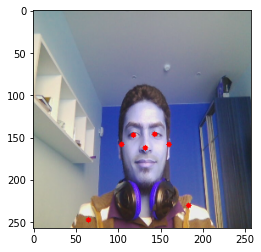

In [115]:
out = draw_on(img, kp)
plt.imshow(out)

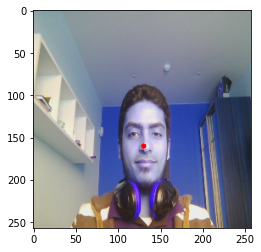

In [100]:
dede = img.copy()
dede = cv2.resize(dede, (257,257))
cv2.circle(dede, (130, 160), 3, (255,0,0), -1)
plt.imshow(dede)